<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Naive_Bayes_Algorithms_Comparision_Over_Binary_Diabetes_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Naive-Bayes-Classification-Data.csv")
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [4]:
# lets see the info:
def Info(df):
  # Records of Data:
  print(f"Total Record:{df.shape}\n")
  print(f"Columns are:\n{df.columns}\n")
  print("*"*170)

  # Null values and Data Types:
  print("Info:\n")
  print(f"{df.info()}\n")
  print(f"Null Values:\n{df.isnull().sum()}\n")
  print("*"*170)

  # lets see the data is in proportion or not:
  print(f"Output Data proportionality:\n{df.diabetes.value_counts(normalize=True)*100}\n")
Info(df)

Total Record:(995, 3)

Columns are:
Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object')

**************************************************************************************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
None

Null Values:
glucose          0
bloodpressure    0
diabetes         0
dtype: int64

**************************************************************************************************************************************************************************
Output Data proportionality:
1    50.050251
0    49.949749
Name: diabetes, dtype: float64



In [5]:
# lets take a look over first records:
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


Here Blood Pressure is Inversly proportional to diabetes

As blood Pressure decreases diabetes increases



<Axes: >

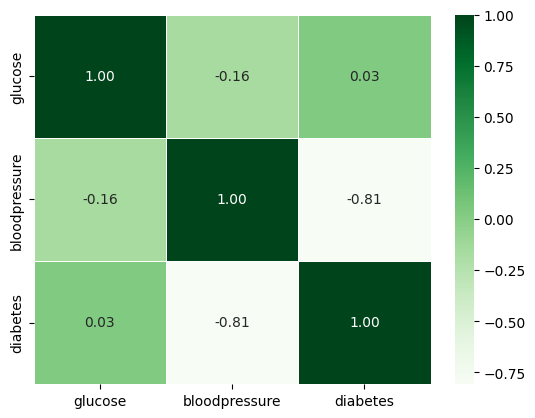

In [7]:
# lets see the correlation :
print("Here Blood Pressure is Inversly proportional to diabetes\n")
print("As blood Pressure decreases diabetes increases\n")
sns.heatmap(data=df.corr(),annot=True,fmt=".2f",linewidth=0.7,cmap="Greens")

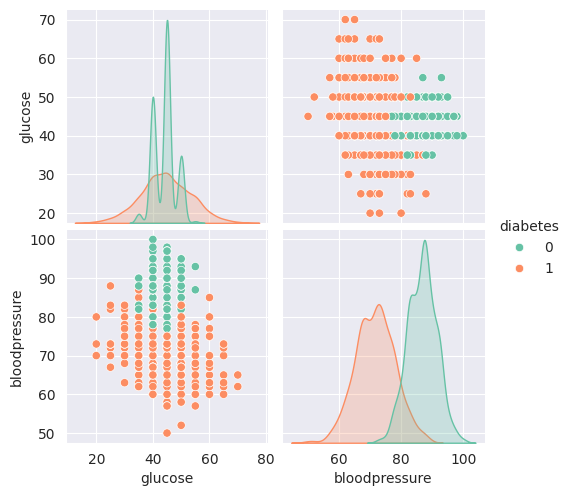

In [19]:
# lets see the pairplot:
sns.pairplot(data=df,hue="diabetes")

In [13]:
# lets see outliers are available in dataset or not:
def box__hist_plot(data,col,bins="auto"):
  fig,axs = plt.subplots(ncols=2,figsize=(11,5))

  sns.histplot(data=data,x=col,ax=axs[0],bins=bins,kde=True,hue="diabetes")
  sns.boxplot(data=data,x=col,ax=axs[1],hue="diabetes")

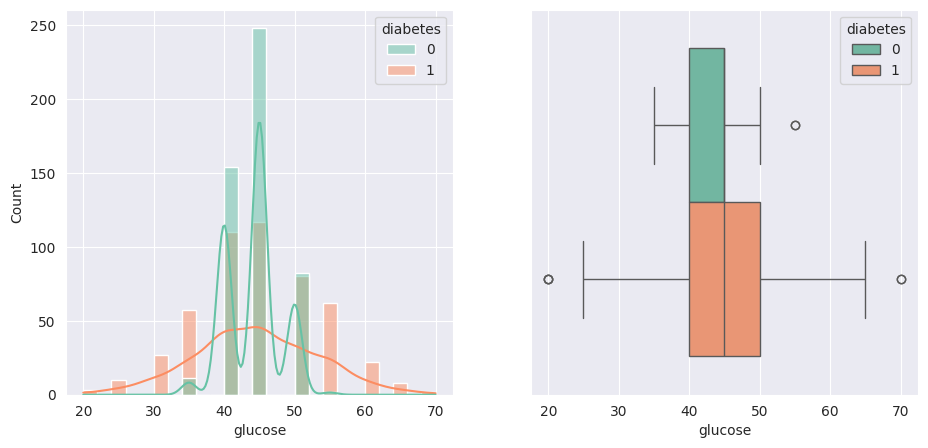

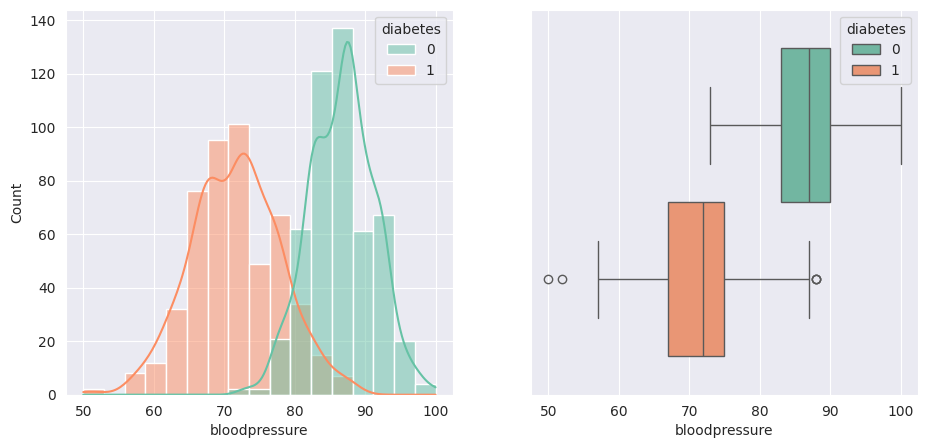

In [15]:
sns.set_style("darkgrid")
sns.set_palette("Set2")
for col in ['glucose','bloodpressure']:
  box__hist_plot(df,col)

from below plot we understand that if patient has less blood pressure so patient has diabetes

For High Blood Pressure patient does not have diabetes



Text(0.5, 1.0, 'Blood Pressure VS Diabetes Occured or Not\n')

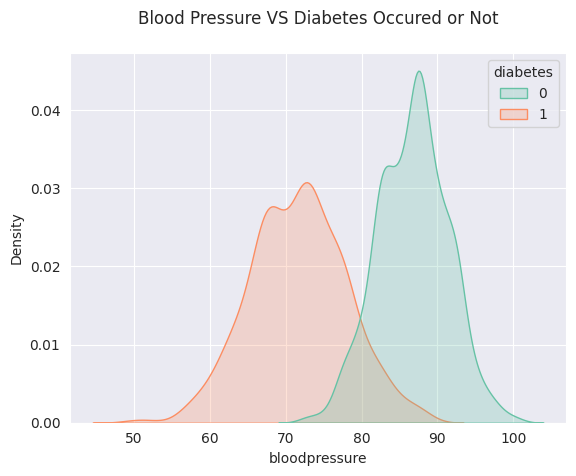

In [22]:
print("from below plot we understand that if patient has less blood pressure so patient has diabetes\n")
print("For High Blood Pressure patient does not have diabetes\n")
sns.kdeplot(data=df,x="bloodpressure",fill=True,hue="diabetes")
plt.title("Blood Pressure VS Diabetes Occured or Not\n")

from below plot we understood that Maybe Non-Diabetic Patients have glucose levels consistent between range 30-60

Where as patient glucose levels varies can be found as across wider range



Text(0.5, 1.0, 'Diabetic VS Non-Diabetic Patiens According to Glucose Levels\n')

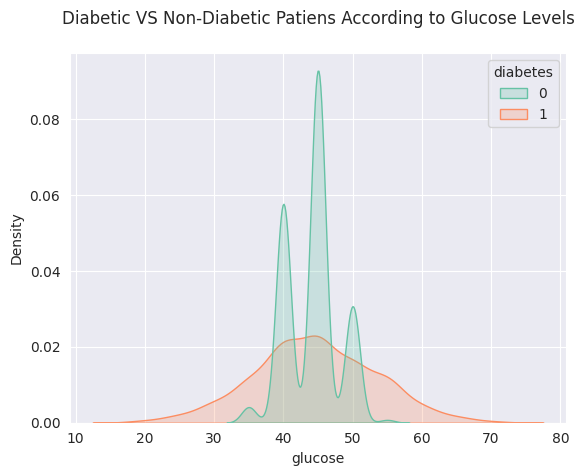

In [26]:
print("from below plot we understood that Maybe Non-Diabetic Patients have glucose levels consistent between range 30-60\n")
print("Where as patient glucose levels varies can be found as across wider range\n")
sns.kdeplot(data=df,x="glucose",hue="diabetes",fill=True)
plt.title("Diabetic VS Non-Diabetic Patiens According to Glucose Levels\n")

### ***Data Splitting***

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df['diabetes'],test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((796, 2), (199, 2))

### ***We seen Some outliers in box plot so lets use Scaling Technqiue to reduce it***
##### ***here we have to use Robust Scaler which robust to outliers***

In [34]:
from sklearn.preprocessing import RobustScaler

In [35]:
rs = RobustScaler()

In [36]:
x_train_scaled = rs.fit_transform(x_train)
x_test_scaled = rs.fit_transform(x_test)

In [103]:
# lets see the impact on outliers after using Robust Scaler:
# we have 2d array lets convert them into dataframe:
out_gs_bp1 = pd.DataFrame(x_train_scaled,columns=x_train.columns)
out_gs_bp1_test = pd.DataFrame(x_test_scaled,columns=x_train.columns)

In [104]:
out_gs_bp1

,glucose,bloodpressure
0,0.0,0.666667
1,0.0,-0.133333
2,-0.5,-0.133333
3,-2.0,-0.466667
4,-0.5,-0.533333
...,...,...
791,0.0,-0.333333
792,1.0,-0.866667
793,-1.0,-0.133333
794,-0.5,0.866667


In [105]:
out_gs_bp1_test

,glucose,bloodpressure
0,-0.5,-0.5000
1,-0.5,-0.1875
2,0.0,-0.8125
3,0.0,0.9375
4,0.0,0.6250
...,...,...
194,0.5,0.3125
195,-1.0,-0.3750
196,0.0,0.5625
197,0.0,0.1250


<Axes: title={'center': 'Before Scaling Outliers Position on Testing Data\n'}>

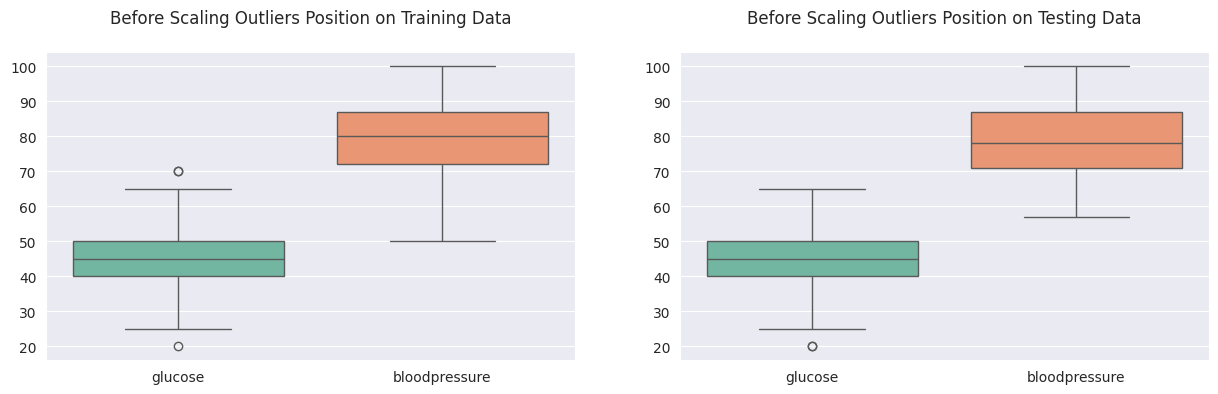

In [110]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,4))

ax1.set_title("Before Scaling Outliers Position on Training Data\n")
sns.boxplot(data=x_train,ax=ax1)
ax2.set_title("Before Scaling Outliers Position on Testing Data\n")
sns.boxplot(data=x_test,ax=ax2)

<Axes: title={'center': 'After Scaling Outliers Position on Testing Data\n'}>

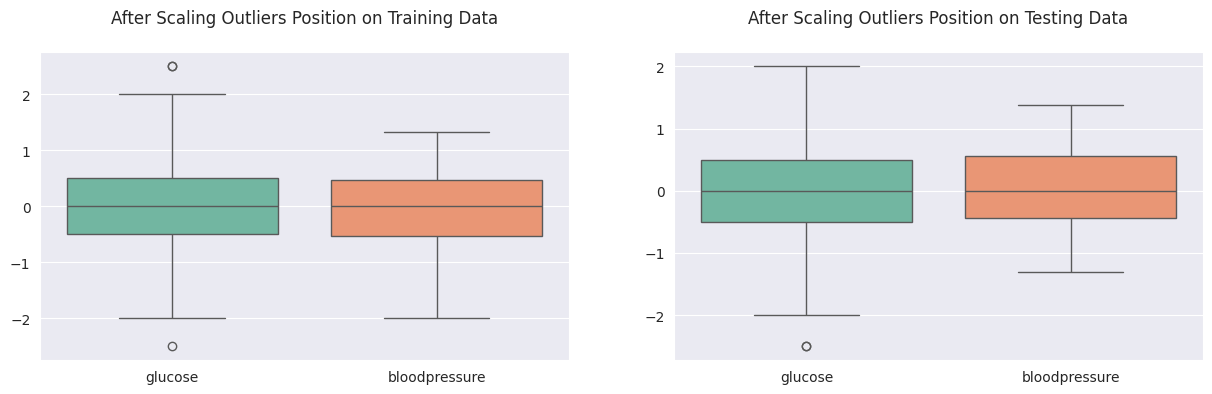

In [109]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,4))

ax1.set_title("After Scaling Outliers Position on Training Data\n")
sns.boxplot(data=out_gs_bp1,ax=ax1)
ax2.set_title("After Scaling Outliers Position on Testing Data\n")
sns.boxplot(data=out_gs_bp1_test,ax=ax2)

### ***Modeling***
##### ***Lets use 1st GussianNB***

In [37]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [38]:
model = GaussianNB()

In [39]:
# train:
model.fit(x_train_scaled,y_train)

GaussianNB()

In [40]:
# lets check the data accuracy:
model.score(x_train_scaled,y_train)*100

93.46733668341709

In [146]:
# test:
y_pred = model.predict(x_test_scaled)
y_pred[:5]

array([1, 1, 1, 0, 0])

In [147]:
# Actual data:
y_test.values[:5]

array([1, 1, 1, 0, 0])

<Axes: >

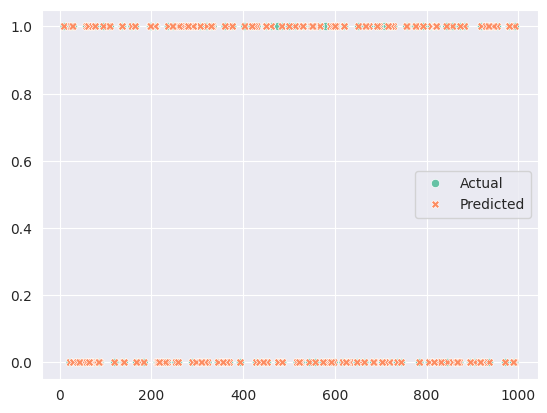

In [44]:
# lets see actual vs predicted plot:
ndf = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
sns.scatterplot(data=ndf)

In [49]:
# lets see how bernoulli model works:
bern = BernoulliNB()

In [50]:
# train:
bern.fit(x_train_scaled,y_train)

BernoulliNB()

In [148]:
# test:
y2_pred = bern.predict(x_test_scaled)
y2_pred[:5]

array([1, 1, 1, 0, 0])

In [149]:
# actual :
y_test.values[:5]

array([1, 1, 1, 0, 0])

In [53]:
# lets see how multinomialNB works :
mult = MultinomialNB()

In [54]:
# train:
mult.fit(x_train,y_train) # we are not using scaled value beacuse after scaeling it gives values accroding to median and interquartile range
# SO we are getting negative values and multinomialNB Not supports negative values:

MultinomialNB()

In [150]:
# test:
y3_pred = mult.predict(x_test)
y3_pred[:5]

array([1, 0, 1, 0, 0])

In [151]:
# actaul data:
y_test.values[:5]

array([1, 1, 1, 0, 0])

### ***Data Accuracy***

In [61]:
# lets see the which algorithm gives better data accuarcy:
print("Data Accuracy According To Each Model:\n")
print(f"GaussianNB:\n{model.score(x_train_scaled,y_train)*100}\n")
print(f"BernoulliNB:\n{bern.score(x_train_scaled,y_train)*100}\n")
print(f"MultinomialNB:\n{mult.score(x_train,y_train)*100}\n")

Data Accuracy According To Each Model:

GaussianNB:
93.46733668341709

BernoulliNB:
91.58291457286433

MultinomialNB:
76.00502512562815



### ***Performance Metrics/Evaluation***

In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [63]:
# lets see the each model accuracy:
print("Model Accuracy According To Each Model:\n")
print(f"GaussianNB:\n{accuracy_score(y_test,y_pred)*100}\n")
print(f"BernoulliNB:\n{accuracy_score(y_test,y2_pred)*100}\n")
print(f"MultinomialNB:\n{accuracy_score(y_test,y3_pred)*100}\n")

Model Accuracy According To Each Model:

GaussianNB:
93.96984924623115

BernoulliNB:
91.95979899497488

MultinomialNB:
73.86934673366834



In [64]:
# lets see the precision score:
# It gives how positive prediction done by the model by cathcing false positives:
print("Precision Score According To Each Model:\n")
print(f"GaussianNB:\n{precision_score(y_test,y_pred)*100}\n")
print(f"BernoulliNB:\n{precision_score(y_test,y2_pred)*100}\n")
print(f"MultinomialNB:\n{precision_score(y_test,y3_pred)*100}\n")

Precision Score According To Each Model:

GaussianNB:
98.95833333333334

BernoulliNB:
95.0

MultinomialNB:
82.92682926829268



In [66]:
# Lets see the Recall score:
# It gives how positive predictions done by the model by catching false negatives:
print("Recall Score According To Each Model:\n")
print(f"GaussianNB:\n{recall_score(y_test,y_pred)*100}\n")
print(f"BernoulliNB:\n{recall_score(y_test,y2_pred)*100}\n")
print(f"MultinomialNB:\n{recall_score(y_test,y3_pred)*100}\n")

Recall Score According To Each Model:

GaussianNB:
89.62264150943396

BernoulliNB:
89.62264150943396

MultinomialNB:
64.15094339622641



Text(0.5, 1.0, 'MultinomialNB Model\n')

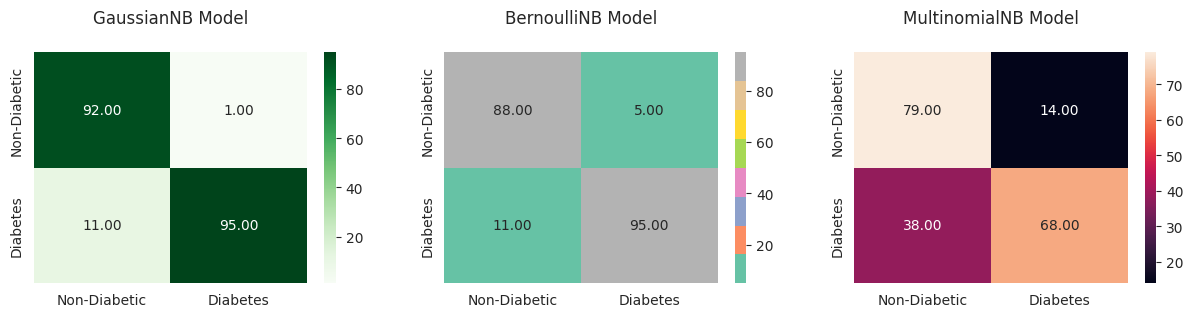

In [82]:
# lets see the confusion matrix over each model:
plt.figure(figsize=(15,3))
plt.subplot(131)
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt=".2f",cmap="Greens",xticklabels=['Non-Diabetic','Diabetes'],yticklabels=['Non-Diabetic','Diabetes'])
plt.title("GaussianNB Model\n")
plt.subplot(132)
sns.heatmap(data=confusion_matrix(y_test,y2_pred),annot=True,fmt=".2f",cmap="Set2",xticklabels=['Non-Diabetic','Diabetes'],yticklabels=['Non-Diabetic','Diabetes'])
plt.title("BernoulliNB Model\n")
plt.subplot(133)
sns.heatmap(data=confusion_matrix(y_test,y3_pred),annot=True,fmt=".2f",xticklabels=['Non-Diabetic','Diabetes'],yticklabels=['Non-Diabetic','Diabetes'])
plt.title("MultinomialNB Model\n")

In [85]:
print(f"GaussianNB Classiffication report:\n\n{classification_report(y_test,y_pred)}\n")
print("*"*100)
print(f"BernoulliNB Classification report:\n\n{classification_report(y_test,y2_pred)}\n")
print("*"*100)
print(f"MultinomialNB Classification report:\n\n{classification_report(y_test,y3_pred)}")

GaussianNB Classiffication report:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        93
           1       0.99      0.90      0.94       106

    accuracy                           0.94       199
   macro avg       0.94      0.94      0.94       199
weighted avg       0.94      0.94      0.94       199


****************************************************************************************************
BernoulliNB Classification report:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        93
           1       0.95      0.90      0.92       106

    accuracy                           0.92       199
   macro avg       0.92      0.92      0.92       199
weighted avg       0.92      0.92      0.92       199


****************************************************************************************************
MultinomialNB Classification report:

              precision    recal

In [88]:
# lets see the actual data vs predicted data plot:
ndf = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
ndf1 = pd.DataFrame({"Actual":y_test,"Predicted":y2_pred})
ndf3 = pd.DataFrame({"Actual":y_test,"Predicted":y3_pred})

Text(0.5, 1.0, 'MultinomialNB Actual VS Predicted Data\n')

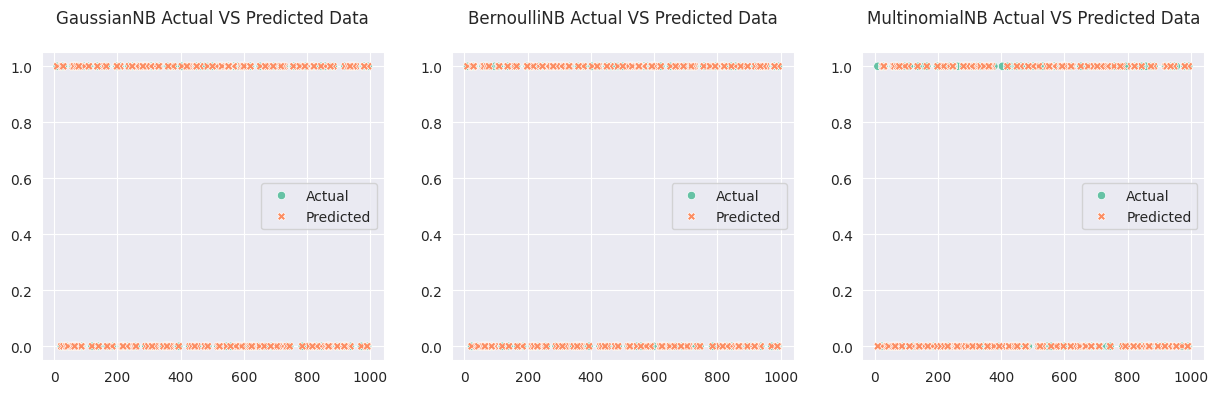

In [93]:
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.scatterplot(data=ndf)
plt.title("GaussianNB Actual VS Predicted Data\n")
plt.subplot(132)
sns.scatterplot(data=ndf1)
plt.title("BernoulliNB Actual VS Predicted Data\n")
plt.subplot(133)
sns.scatterplot(data=ndf3)
plt.title("MultinomialNB Actual VS Predicted Data\n")

### ***Lets see How Linear Model Performs On Binary Dataset:***

In [113]:
# logistic Regression:
from sklearn.linear_model import LogisticRegression

# decision Tree:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [114]:
log = LogisticRegression()

In [115]:
# train:
log.fit(x_train_scaled,y_train)

LogisticRegression()

In [121]:
# Data Accuracy:
log.score(x_train_scaled,y_train)*100

93.09045226130654

In [119]:
# test:
log_pred = log.predict(x_test_scaled)
log_pred[:5]

array([1, 1, 1, 0, 0])

In [120]:
# actual:
y_test.values[:5]

array([1, 1, 1, 0, 0])

#### ***Performance Metrics***

In [122]:
# accuracy_score:
accuracy_score(y_test,log_pred)*100

90.45226130653266

In [123]:
# precision score:
precision_score(y_test,log_pred)*100

96.7741935483871

In [124]:
# recall score:
recall_score(y_test,log_pred)*100

84.90566037735849

<Axes: >

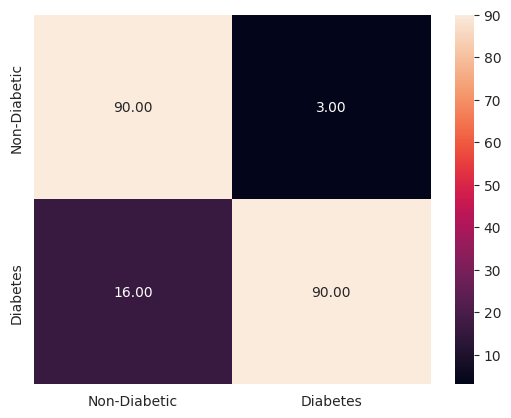

In [126]:
# confusion_matrix:
sns.heatmap(data=confusion_matrix(y_test,log_pred),annot=True,fmt=".2f",xticklabels=['Non-Diabetic','Diabetes'],yticklabels=['Non-Diabetic','Diabetes'])

### ***Lets build DecisionTreeClassfier:***
##### ***In Decision Tree there will be no impact of scaling beacuse it splits the data according to the Root Node or we can say it split the data accoridng to relationship with the other features.***


In [127]:
clf = DecisionTreeClassifier()

In [128]:
# train:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [131]:
# test:
clf_pred = clf.predict(x_test)
clf_pred[:5]

array([1, 1, 1, 0, 0])

In [132]:
# actual:
y_test.values[:5]

array([1, 1, 1, 0, 0])

In [133]:
# lets see the data accuracy:
clf.score(x_train,y_train)*100

94.09547738693468

### ***performance Metrics:***

In [134]:
# Accuacy score:
accuracy_score(y_test,clf_pred)*100

94.47236180904522

In [135]:
# precision:
precision_score(y_test,clf_pred)*100

96.11650485436894

In [136]:
# recall:
recall_score(y_test,clf_pred)*100

93.39622641509435

<Axes: >

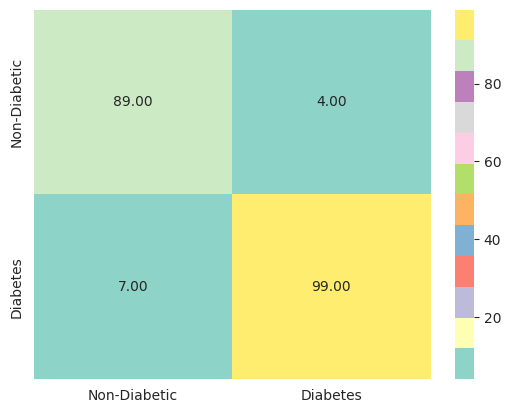

In [139]:
# confusion matrix:
sns.heatmap(data=confusion_matrix(y_test,clf_pred),annot=True,fmt=".2f",cmap="Set3",xticklabels=['Non-Diabetic','Diabetes'],yticklabels=['Non-Diabetic','Diabetes'])

### ***Accuracy of Decision Tree 4% better than Logistic Regression***

In [142]:
# classification report:
print(f"Logistic regression classification report:\n\n{classification_report(y_test,log_pred)}\n")
print(f"DecisionTreeclassifier classfication report:\n\n{classification_report(y_test,clf_pred)}")

Logistic regression classification report:

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        93
           1       0.97      0.85      0.90       106

    accuracy                           0.90       199
   macro avg       0.91      0.91      0.90       199
weighted avg       0.91      0.90      0.90       199


DecisionTreeclassfier classfication report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        93
           1       0.96      0.93      0.95       106

    accuracy                           0.94       199
   macro avg       0.94      0.95      0.94       199
weighted avg       0.95      0.94      0.94       199



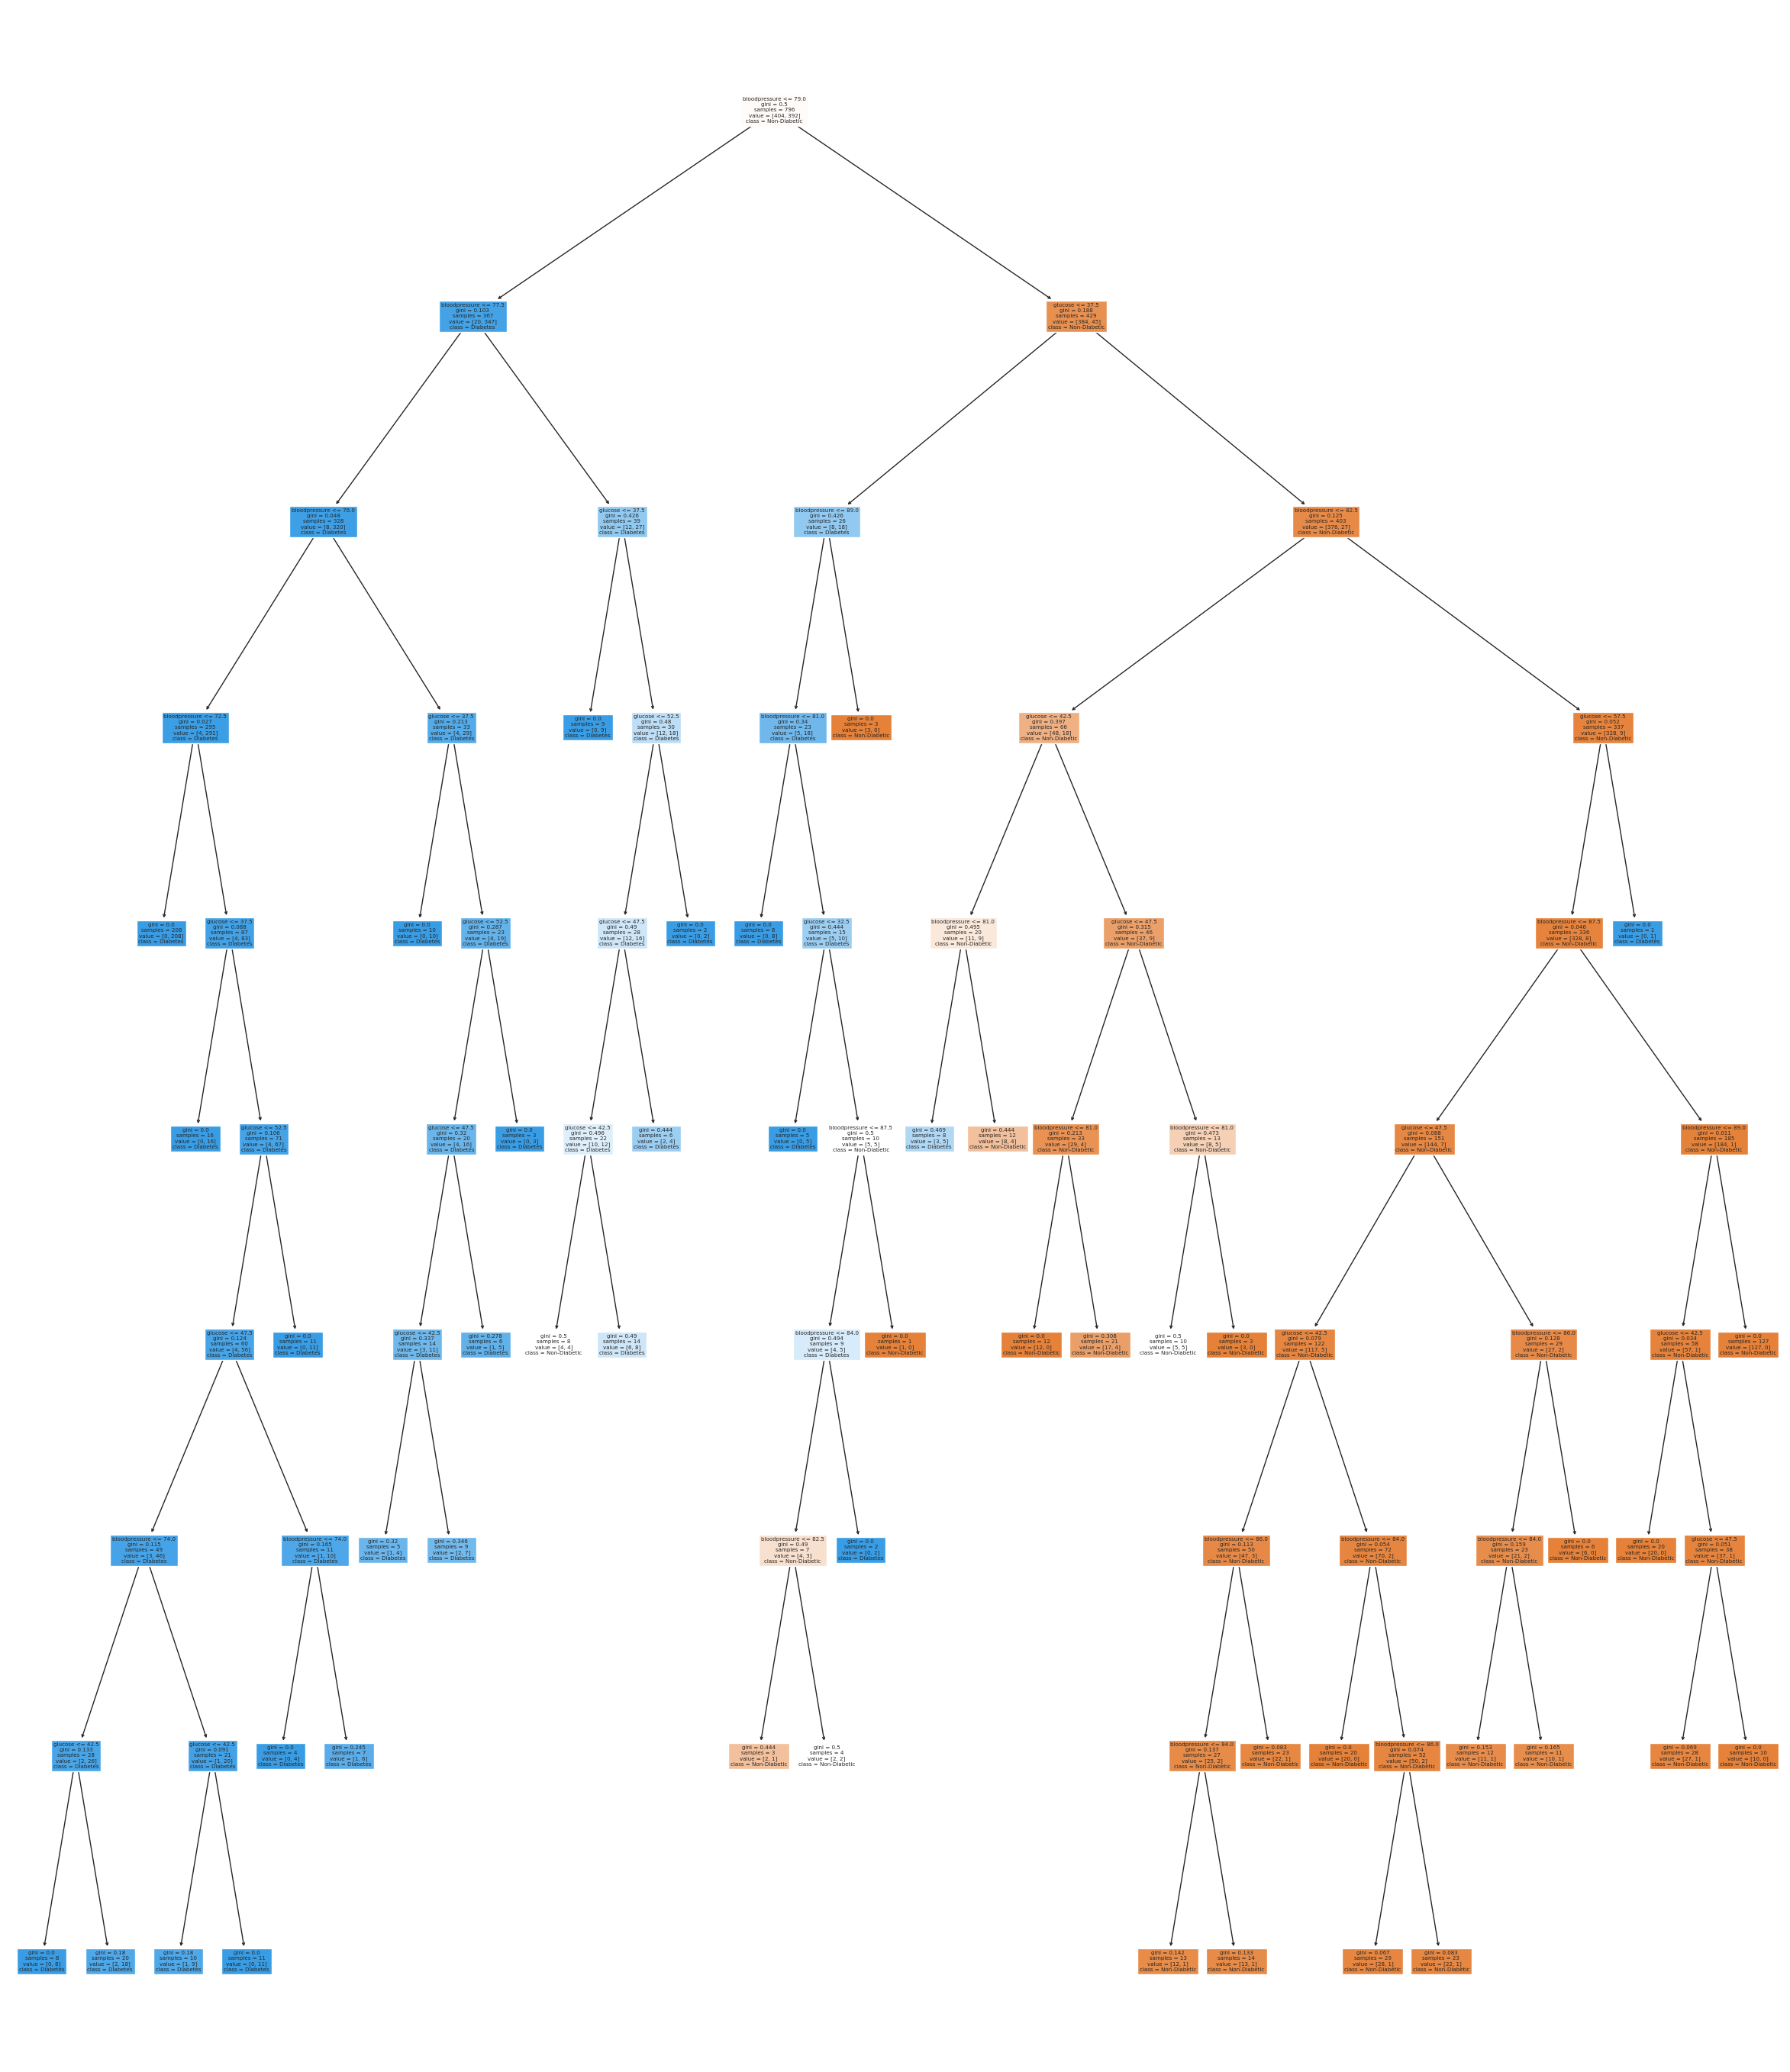

In [145]:
# Lets plot the Tree:
plt.figure(figsize=(30,35))
tree.plot_tree(clf,feature_names=x_train.columns,class_names=['Non-Diabetic','Diabetes'],filled=True);